# Dimension Rduction

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Principal Component Analysis (PCA)

**Principal component analysis** is a method that **rotates the dataset in a way such that
the rotated features are statistically uncorrelated**. 

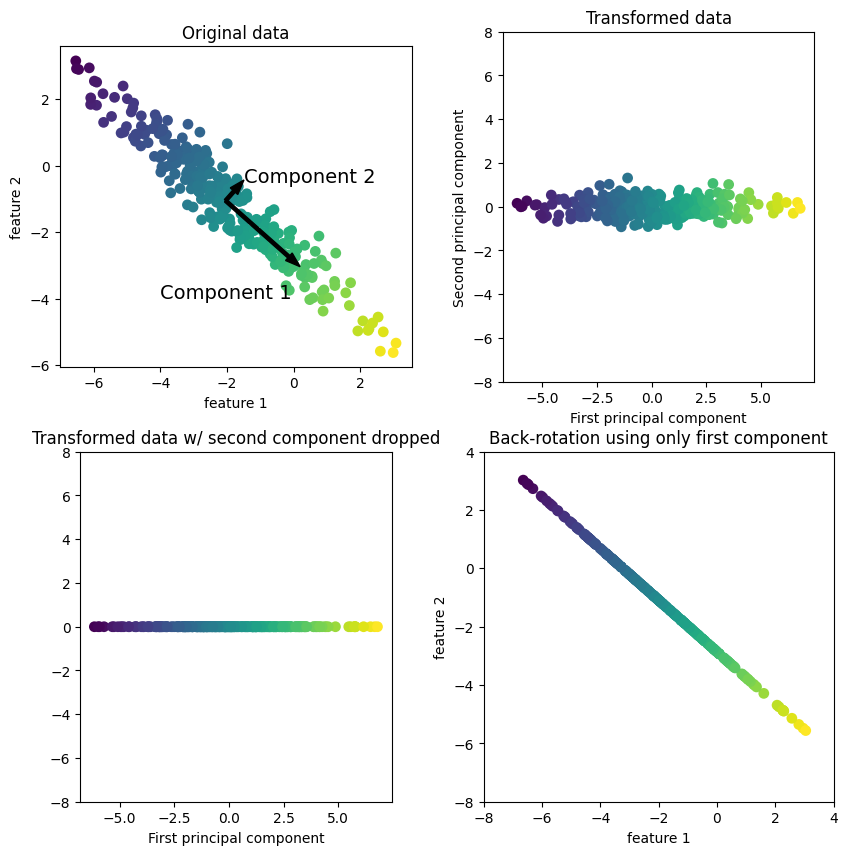

In [2]:
from helpers.plot_pca import plot_pca_illustration

plot_pca_illustration()

### Applying PCA to the cancer dataset for visualization

**One of the most common applications of PCA is visualizing high-dimensional datasets.**

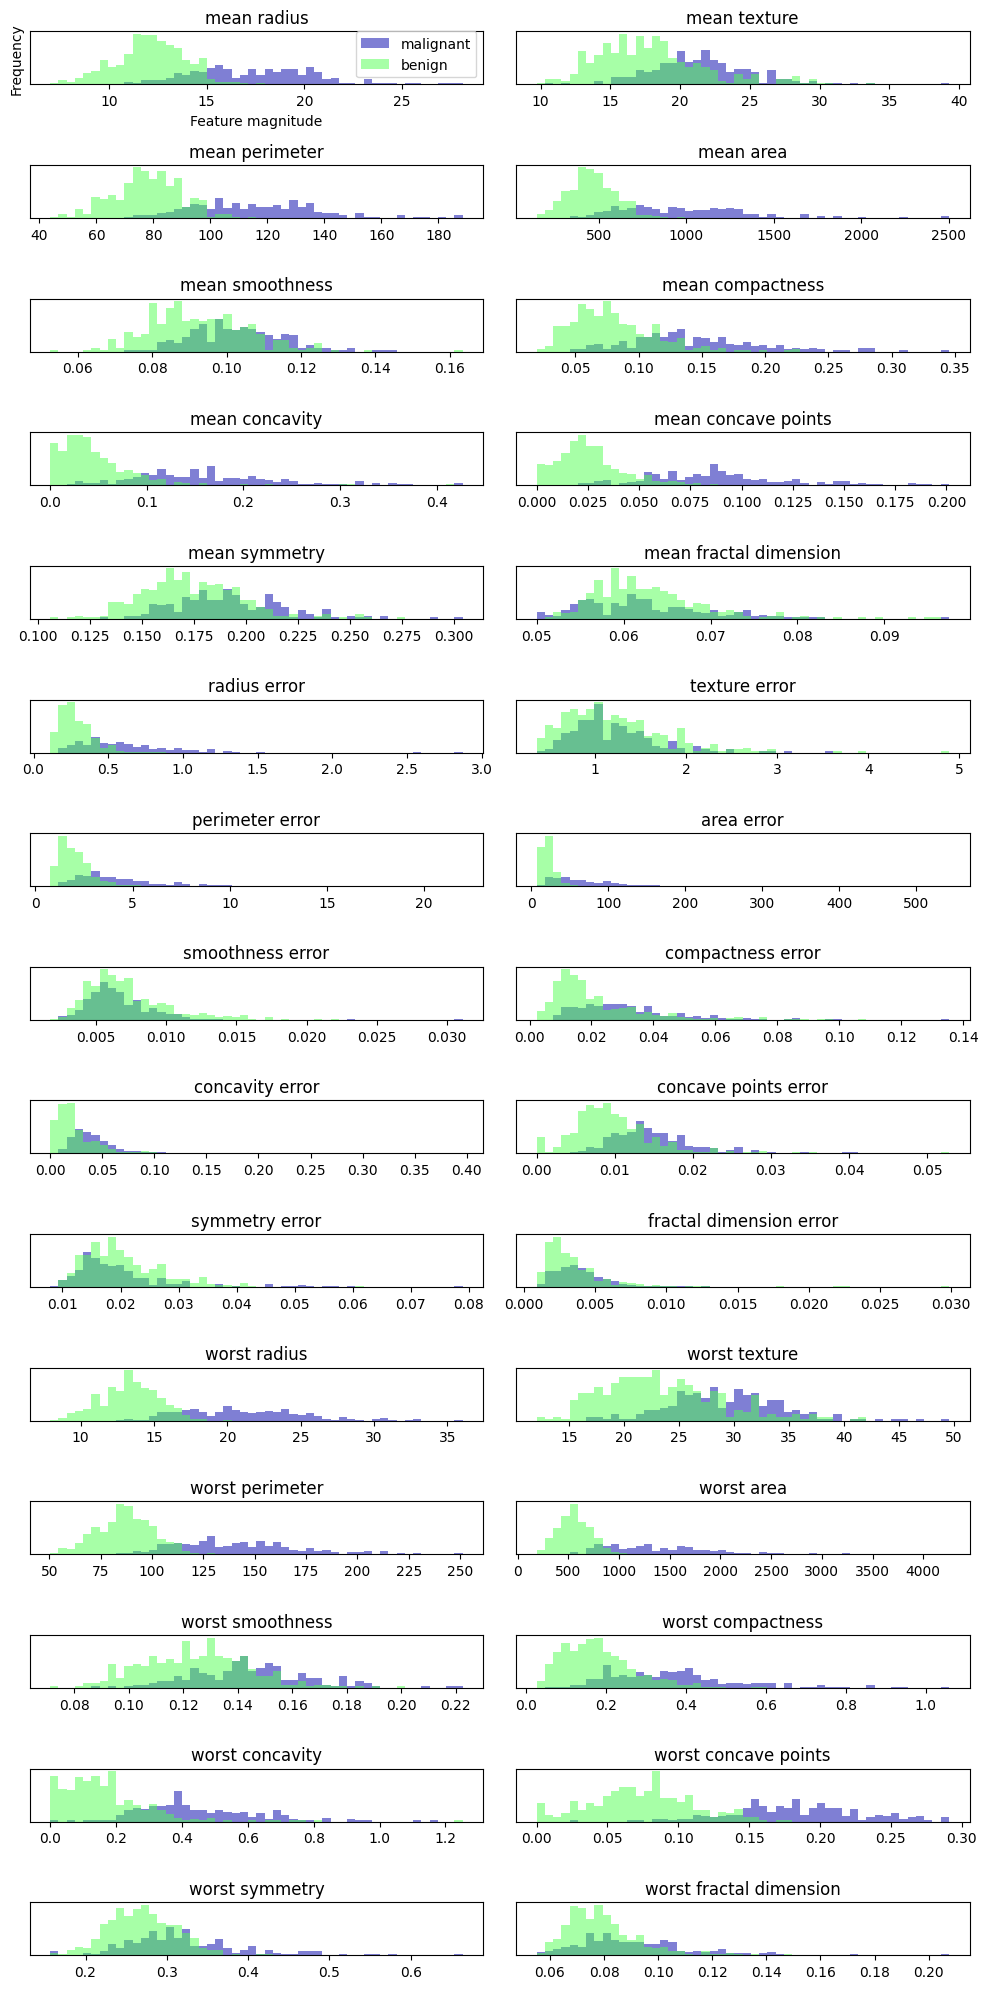

In [3]:
from helpers import plot_helpers
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=plot_helpers.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=plot_helpers.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()
plt.show()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [5]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)

# fit PCA model to breast cancer data
pca.fit(X_scaled)

PCA(n_components=2)

In [6]:
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print(f"Original shape: {str(X_scaled.shape)}")
print(f"Reduced shape: {str(X_pca.shape)}")

Original shape: (569, 30)
Reduced shape: (569, 2)


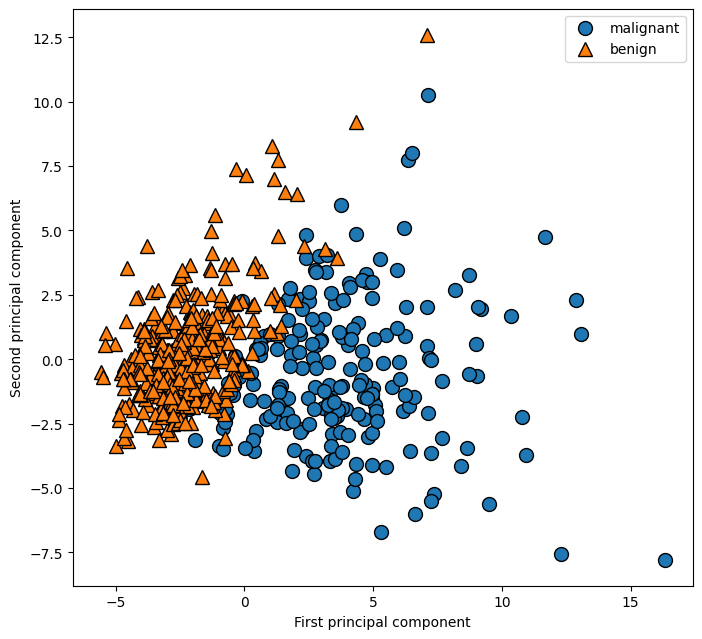

In [7]:
from helpers.plot_helpers import discrete_scatter

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)

plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.show()

In [8]:
print(f"PCA component shape: {pca.components_.shape}")

PCA component shape: (2, 30)


In [9]:
print(f"PCA components:\n{pca.components_}")

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


### Eigenfaces for feature extraction

**Another application of PCA that we mentioned earlier is feature extraction.**

**A great
example of an application where feature extraction is helpful is with images.**


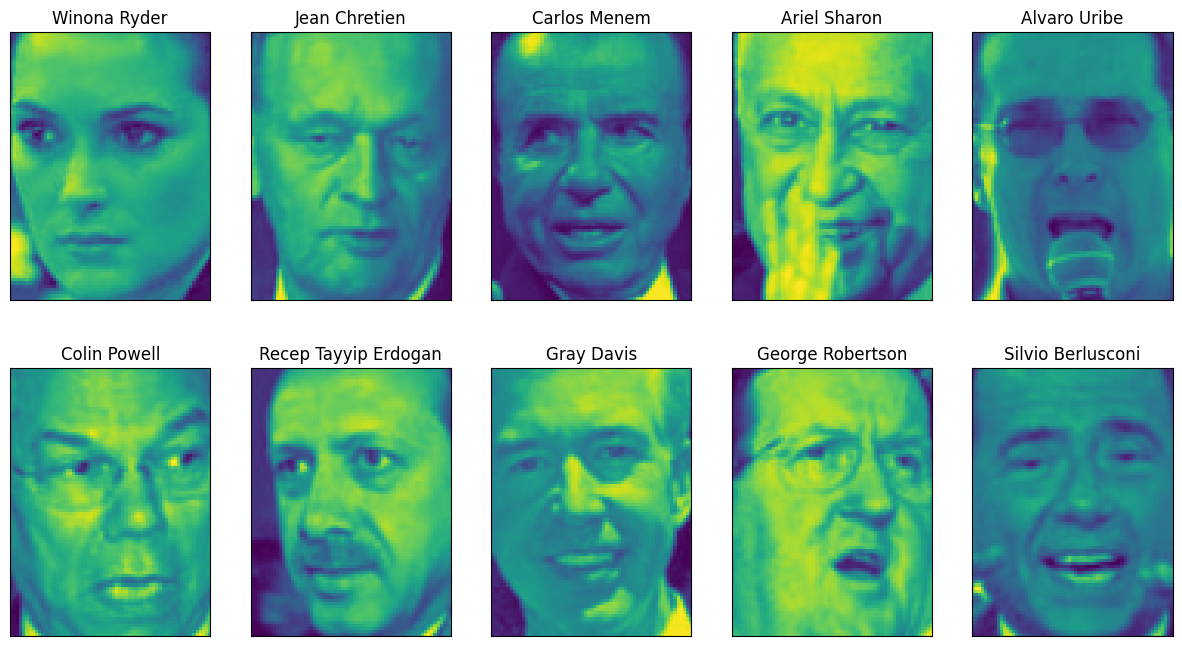

In [10]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    
plt.show()

In [11]:
print(f"people.images.shape: {people.images.shape}")
print(f"Number of classes: {len(people.target_names)}")

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [12]:
#count how often each target appears
counts = np.bincount(people.target)

# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f"{name:25} {count:3}", end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [13]:
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print(f"Test set score of 1-nn: {knn.score(X_test, y_test):.2f}")

Test set score of 1-nn: 0.22


**This is where PCA comes in. Computing distances in the original pixel space is quite
a bad way to measure similarity between faces.**

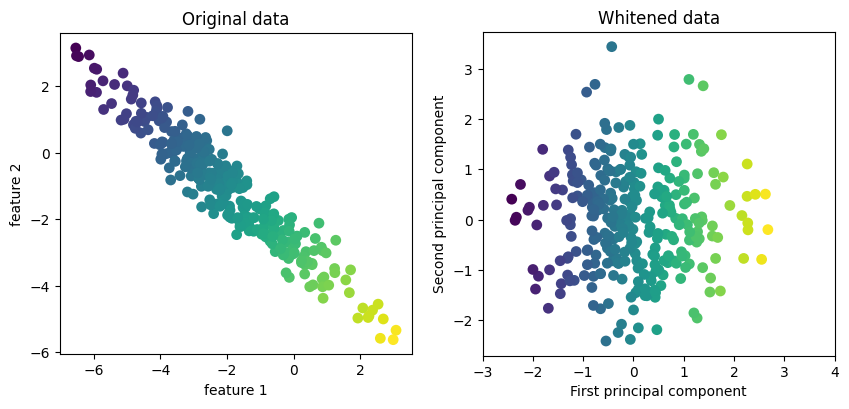

In [15]:
from helpers.plot_pca import plot_pca_whitening

plot_pca_whitening()

In [16]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [17]:
print(f"X_train_pca.shape: {X_train_pca.shape}")

X_train_pca.shape: (1547, 100)


In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print(f"Test set accuracy: {knn.score(X_test_pca, y_test):.2f}")

Test set accuracy: 0.30


In [19]:
print(f"pca.components_.shape: {pca.components_.shape}")

pca.components_.shape: (100, 5655)


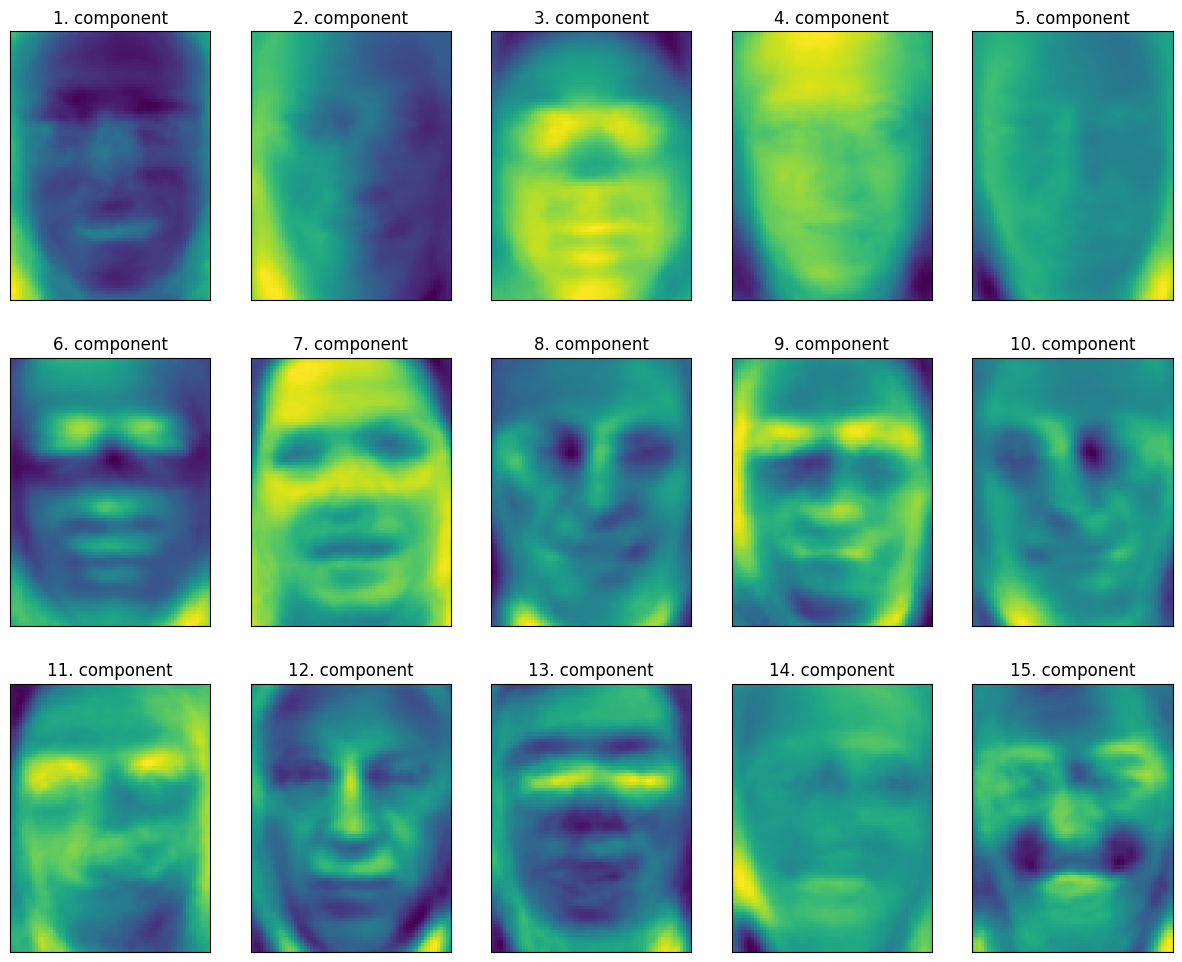

In [20]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))
    
plt.show()

---

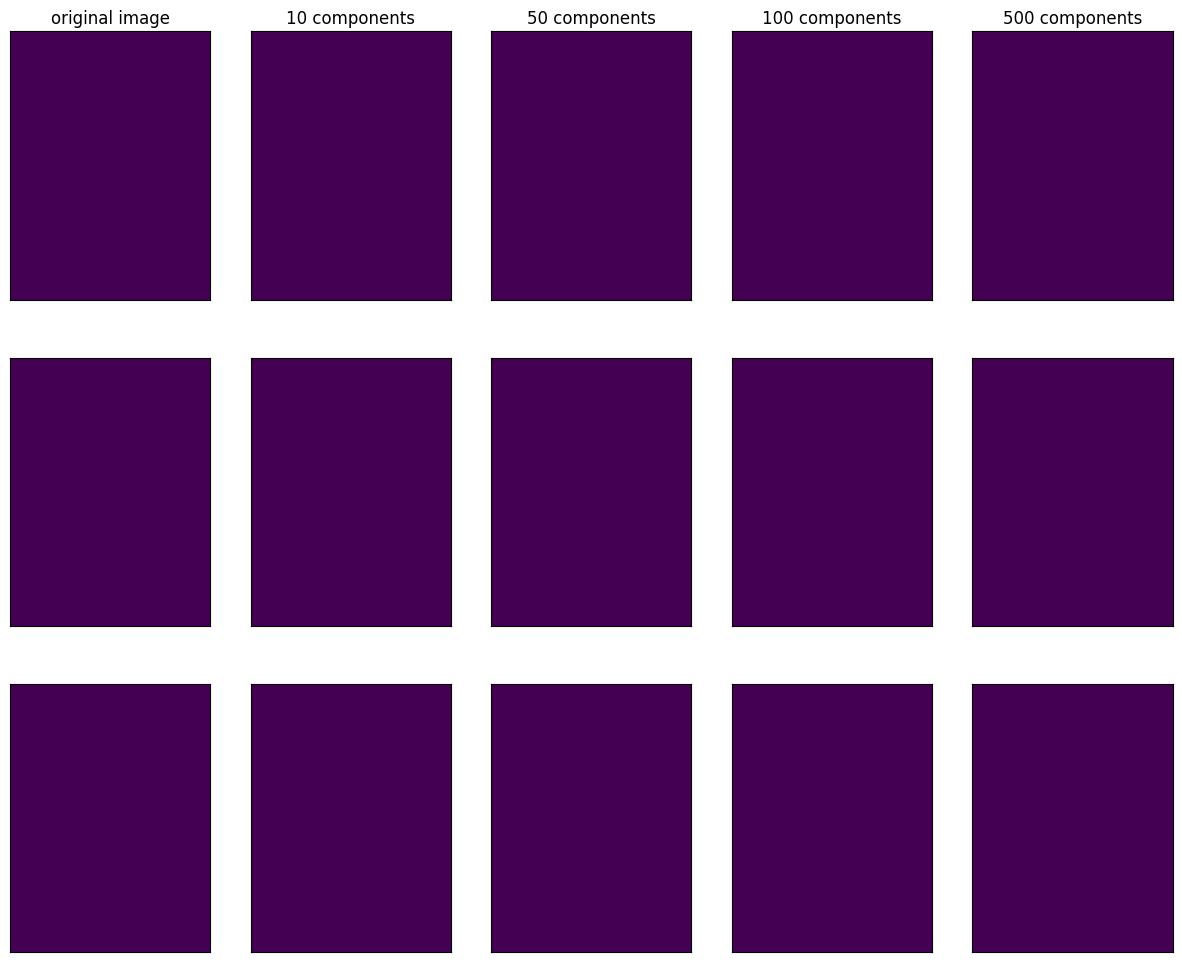

In [21]:
from helpers.plot_pca import plot_pca_faces

plot_pca_faces(X_train, X_test, image_shape)

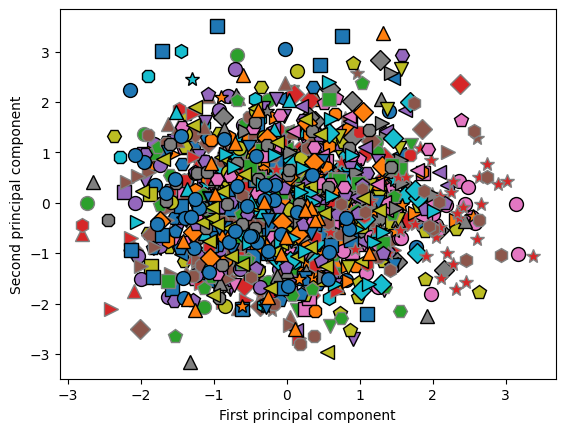

In [22]:
discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

---

## Non-Negative Matrix Factorization (NMF)

**Non-negative matrix factorization is another unsupervised learning algorithm that
aims to extract useful features.**

### Applying NMF to synthetic data

c:\Users\Fakulteta\Desktop\WORK\python-machine-learning-public\.venv\Lib\site-packages\sklearn\decomposition\_nmf.py:1199: FutureWarning: The default value of `n_components` will change from `None` to `'auto'` in 1.6. Set the value of `n_components` to `None` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Fakulteta\Desktop\WORK\python-machine-learning-public\.venv\Lib\site-packages\sklearn\decomposition\_nmf.py:1199: FutureWarning: The default value of `n_components` will change from `None` to `'auto'` in 1.6. Set the value of `n_components` to `None` explicitly to suppress the warning.
  warnings.warn(


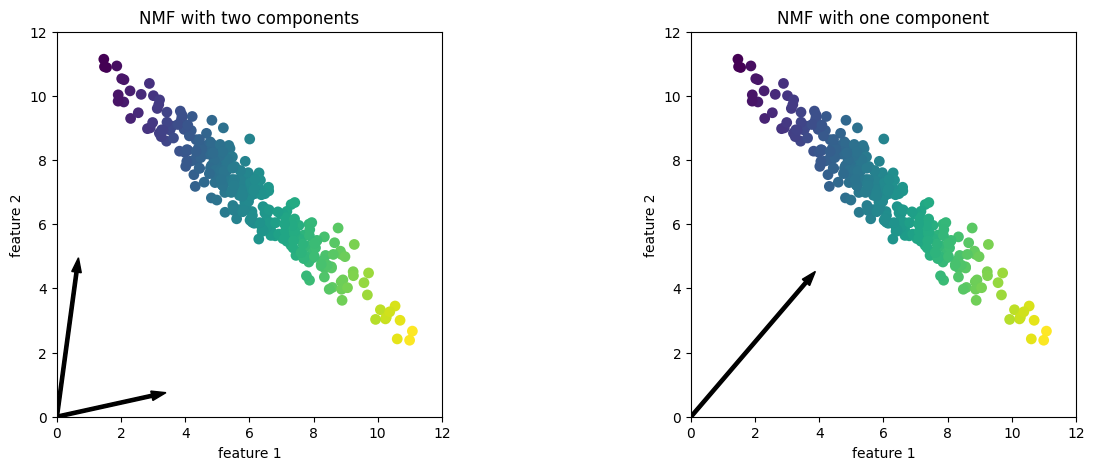

In [23]:
from helpers.plot_nmf import plot_nmf_illustration

plot_nmf_illustration()

### Example: Dimensionality Reduction in Eurovision Data

In [24]:
import seaborn as sns

In [25]:
eurovision = pd.read_csv("data/eurovision-2016.csv")
televote_rank = eurovision.pivot(index='From country', columns='To country', values='Televote Rank')

# fill NAs by min per country
televote_rank.fillna(televote_rank.min(), inplace=True)
televote_rank.head()

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,9.0,1.0,13.0,19.0,14.0,3.0,20.0,12.0,22.0,11.0,...,7.0,16.0,6.0,4.0,26.0,23.0,8.0,24.0,5.0,18.0
Armenia,1.0,12.0,7.0,25.0,17.0,15.0,22.0,5.0,18.0,4.0,...,21.0,6.0,10.0,1.0,23.0,13.0,9.0,11.0,2.0,20.0
Australia,12.0,1.0,8.0,22.0,1.0,2.0,18.0,13.0,25.0,4.0,...,10.0,5.0,15.0,6.0,17.0,9.0,20.0,16.0,3.0,7.0
Austria,12.0,8.0,2.0,24.0,14.0,6.0,19.0,16.0,23.0,10.0,...,20.0,25.0,1.0,3.0,7.0,15.0,4.0,5.0,2.0,22.0
Azerbaijan,25.0,9.0,11.0,2.0,16.0,3.0,21.0,17.0,20.0,7.0,...,18.0,6.0,8.0,1.0,24.0,15.0,12.0,19.0,2.0,23.0


In [26]:
televote_rank.shape

(42, 26)

In [27]:
# Import NMF
from sklearn.decomposition import NMF
 
# Create an NMF instance: model
model = NMF(n_components=2, init="random", max_iter=5000)
 
# Fit the model to televote_Rank
model.fit(televote_rank)
 
# Transform the televote_Rank: nmf_features
nmf_features = model.transform(televote_rank)
 
# Print the NMF features
print(nmf_features.shape)
 
print(model.components_.shape)

(42, 2)
(2, 26)


In [28]:
nmf_features[:5]

array([[2.63844586, 3.18272361],
       [2.27381898, 2.99265831],
       [2.16527141, 3.06156764],
       [3.2561539 , 1.96996988],
       [2.31891342, 2.89070403]])

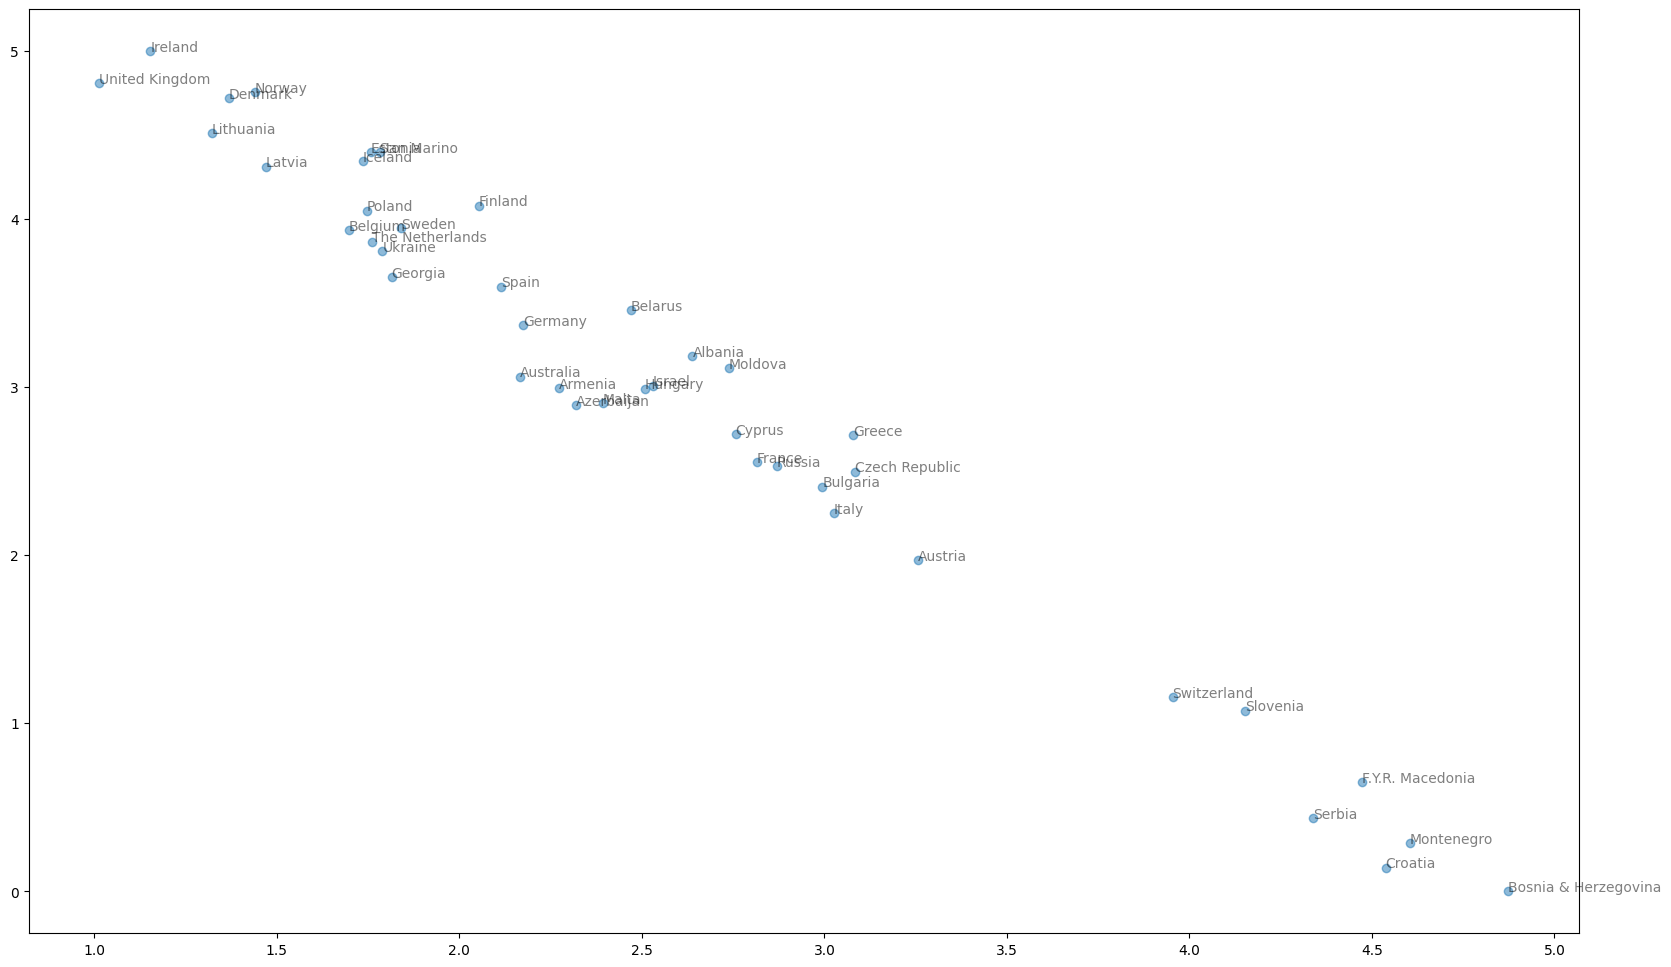

In [29]:
plt.figure(figsize=(20,12))

countries = np.array(televote_rank.index)
xs = nmf_features[:,0]
 
# Select the 1th feature: ys
ys = nmf_features[:,1]
 
# Scatter plot
plt.scatter(xs, ys, alpha=0.5)
 
# Annotate the points
for x, y, countries in zip(xs, ys, countries):
    plt.annotate(countries, (x, y), fontsize=10, alpha=0.5)
    
plt.show()

## Manifold Learning with t-SNE

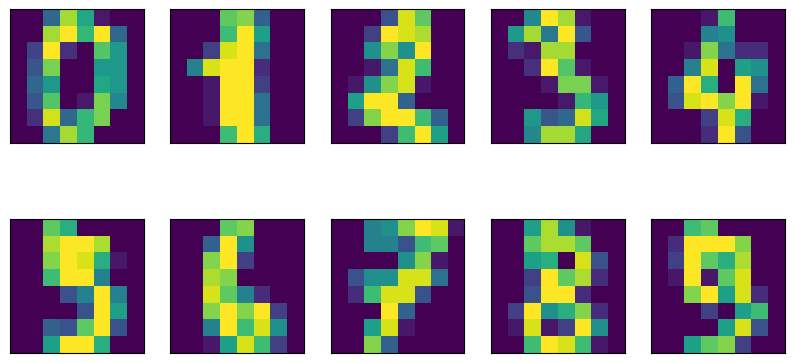

In [30]:
from sklearn.datasets import load_digits

digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)
    
plt.show()

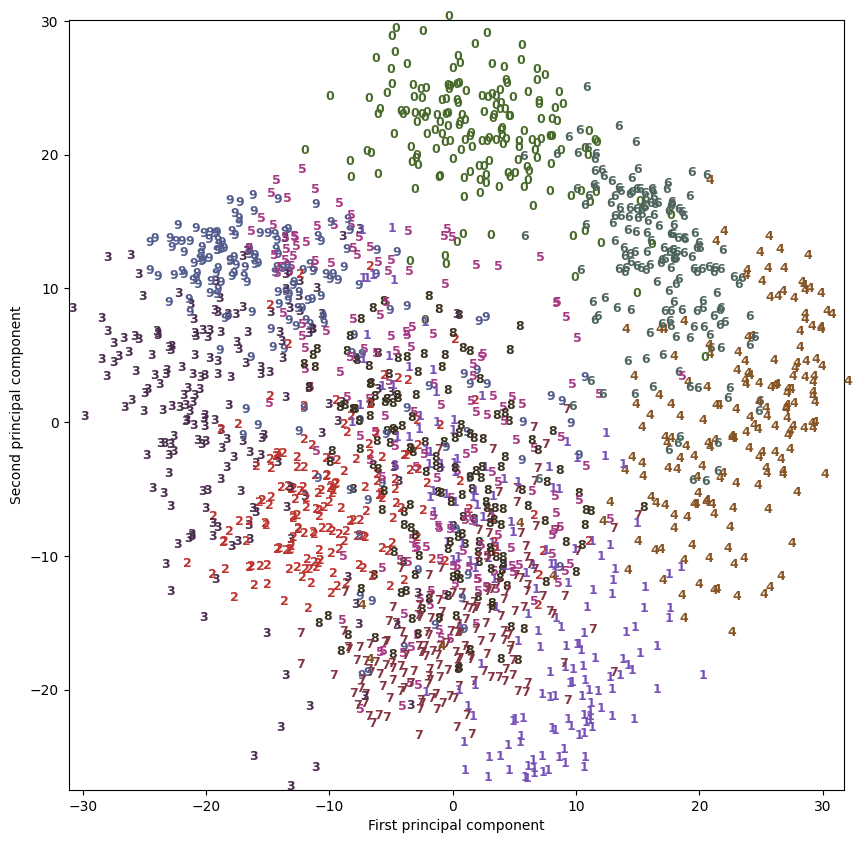

In [31]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)

# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=200, init="random", random_state=42)

# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

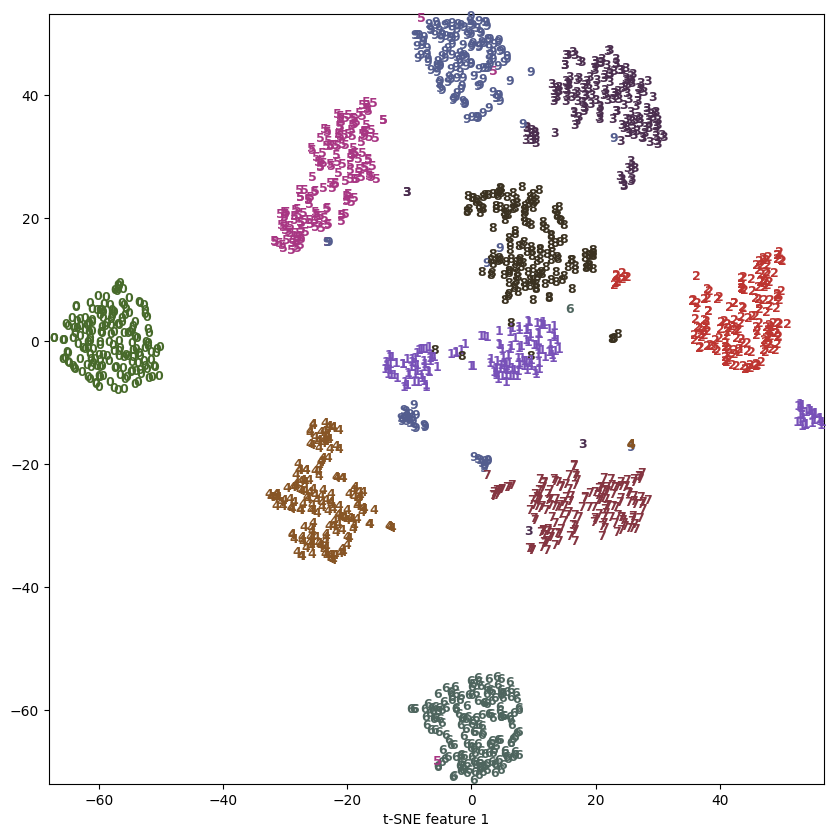

In [33]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")
plt.show()